In [1]:
import os
print(os.getcwd())

path = os.chdir('E:/TIMA/VenturaBasinTiMA_Output')

print(os.getcwd())

# Import neccessary Python libraries

In [2]:
# basic libraries
import pandas as pd
import numpy as np
import tqdm

# image processing libraries
import imageio
import cv2
import visvis as vv

# plotting libraries
from matplotlib import pyplot as plt
import matplotlib
import ternary

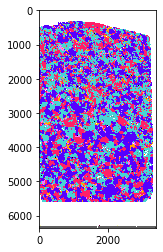

(<matplotlib.image.AxesImage at 0x1e681688f88>, None)

In [3]:
%matplotlib inline
# !pip install opencv-python

img_path = r'E:/TIMA/VenturaBasinTiMA_Output/False_Color_Images_Thin_Sections/CC-17-GR_panorama_Legend_ThinSection.png'

img = imageio.imread(img_path)

# print(img.shape)
# vv.imshow(img)

plt.imshow(img), plt.show()

#### 3.x Mineral Associations Modal Abundances

- possibility of each mineral associated with selected mineral

In [4]:
df_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_associations_modal abundances.csv'
df = pd.read_csv(df_path)
print(df.shape)
df.head()

(594, 31)


,Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Other Minerals,[Unclassified],Biotite-Ti,Clinochlore,Ankerite+clay
0,CC-17-1 - Liberation analysis #1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Quartz,----,19.90,23.55,12.12,18.56,20.57,20.03,24.25,3.58,...,0.00,10.13,8.08,3.37,5.60,25.23,8.51,11.91,0.00,100.00
2,Plagioclase,12.14,----,39.15,8.40,5.03,1.96,1.60,0.00,5.18,...,0.00,8.70,8.78,3.21,66.82,0.00,3.23,3.10,0.00,0.00
3,Orthoclase,13.15,22.36,----,7.62,5.08,2.85,1.85,0.88,0.45,...,0.00,0.00,4.48,0.00,0.78,0.00,2.04,2.85,0.00,0.00
4,Muscovite,0.96,17.10,3.17,----,10.63,19.61,0.00,0.66,0.00,...,0.00,0.81,2.66,0.00,6.79,0.00,1.11,1.85,0.00,0.00


In [5]:
row_break = 32 # every sample only have 32 rows of data

#### 3.x Mineral Properties Modal Abundances

In [6]:
########################################################################
# read and pre-process mineral properties csv for each sample analyzed #
########################################################################

mineral_prop_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_properties_modal_abundances.csv'
mineral_properties = pd.read_csv(mineral_prop_path)

# drop the first row (thin section #/name)

mineral_prop = mineral_properties.copy()[1:].T # transpose the dataframe for subsequent analysis.
mineral_prop.columns = mineral_prop.iloc[0] # use legend as column names
mineral_prop=mineral_prop.tail(-1) # drop the legend row since it is column name now
mineral_prop = mineral_prop.apply(pd.to_numeric) # because some numbers are in string type
mineral_prop['Feldspar'] = mineral_prop['Plagioclase']+mineral_prop['Orthoclase']

# display to check
mineral_prop

Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,Epidote,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Clinochlore,Ankerite+clay,[Unclassified],Total,Feldspar
CCR-18-1_Grain_Mount,7.9,6.0,2.8,0.1,0.5,0.3,3.7,3.4,7.1,13.7,...,0.0,0.0,0.9,0.0,0.0,0.0,0.2,0.3,100.0,8.8
MN16-03_Thin_Section,38.5,29.1,24.1,0.5,0.8,0.0,4.4,0.2,0.1,0.0,...,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.8,100.0,53.2
MN16-04_Thin_Section,38.9,32.6,20.8,1.6,3.1,0.1,0.2,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.8,100.0,53.4
MN-16-04_Grain_Mount,5.8,2.9,1.1,0.7,2.3,2.5,11.0,0.0,8.4,0.2,...,0.2,0.0,1.1,0.0,0.0,0.0,0.0,0.3,100.0,4.0
EDF17-1_Thin_Section,38.7,28.6,24.5,0.9,2.6,0.0,0.2,0.3,0.1,0.0,...,0.0,0.0,0.0,0.0,2.4,0.0,0.0,1.0,100.0,53.1
EDF-17-1_Grain_Mount,17.0,7.1,6.7,0.7,1.1,1.6,31.7,0.0,11.4,0.1,...,0.0,0.0,1.2,0.0,0.3,0.0,0.0,0.5,100.0,13.8
MN17-11_Thin_Section,40.9,28.2,20.2,1.9,2.8,0.1,0.0,1.0,0.4,0.0,...,0.1,0.3,0.0,0.0,1.5,0.0,0.0,1.3,100.0,48.4
MN-17-11_Grain_Mount,2.3,0.9,0.7,0.2,0.7,1.2,0.5,0.0,3.5,0.4,...,0.0,0.0,0.5,0.0,0.0,0.0,0.1,0.2,100.0,1.6
MN-16-05_Thin_Section,3.4,9.9,1.2,0.4,0.9,0.6,4.6,2.1,3.6,33.1,...,0.0,0.0,0.1,0.0,0.1,0.2,0.1,1.0,100.0,11.1
MN16-05_Grain_Mount,12.9,58.9,10.2,0.9,3.0,0.4,0.5,7.5,0.2,2.3,...,0.0,0.1,0.0,0.0,0.2,0.2,0.0,0.9,100.0,69.1


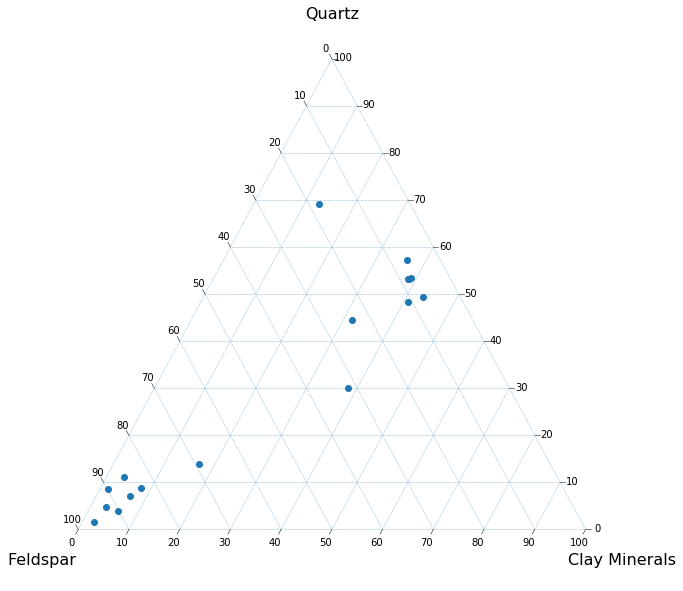

In [26]:
cols = ['Quartz', 'Feldspar', 'Clay Minerals'] # columns selected
fontsize = 16
###################################
## Ternary diagram
###################################
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 10)

tax.scatter(mineral_prop[cols].values)


tax.gridlines(multiple=10) # tick interval
tax.get_axes().axis('off')
tax.ticks(axis='lbr', multiple=10, linewidth=0.5, offset=0.01)
tax.right_corner_label("Clay Minerals", fontsize=fontsize)
tax.top_corner_label("Quartz", fontsize=fontsize)
tax.left_corner_label("Feldspar", fontsize=fontsize)